In [86]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [87]:
import os
import glob

HOME = "/home/kwatchar3/spauq-home/spauq/expt/music-source-seperation/results"

results = glob.glob(os.path.join(HOME, "*.csv"))

dfs = []

for r in results:
    model_name = r.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(r).rename(columns={'Unnamed: 0': 'title', 'Unnamed: 1': 'source'})
    df['model'] = model_name
    dfs.append(df)
    
df = pd.concat(dfs)

In [88]:
dfa = df.groupby(['model', 'title']).mean(numeric_only=True)
dfm = df.groupby(['model'])['SRR'].describe()

dfm

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
HDemucs-HQ-old,200.0,5.721708,4.163024,-7.940515,3.687056,6.023275,8.189791,17.674199
OpenUnmix-umxhq-old,200.0,3.482493,4.480406,-12.777252,1.524287,3.623352,6.306779,13.053051


<Axes: xlabel='SSR', ylabel='Density'>

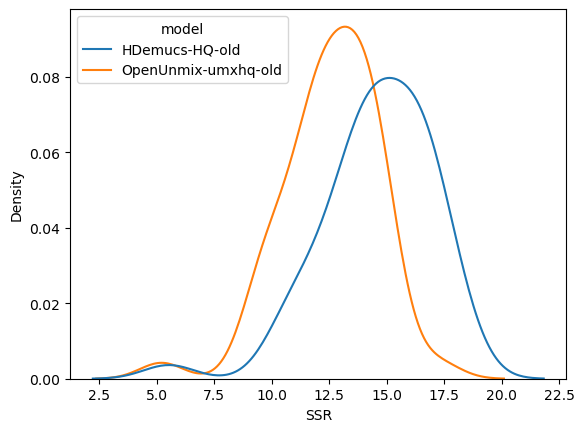

In [89]:
sns.kdeplot(dfa, x='SSR', hue='model')

<Axes: xlabel='SRR', ylabel='Density'>

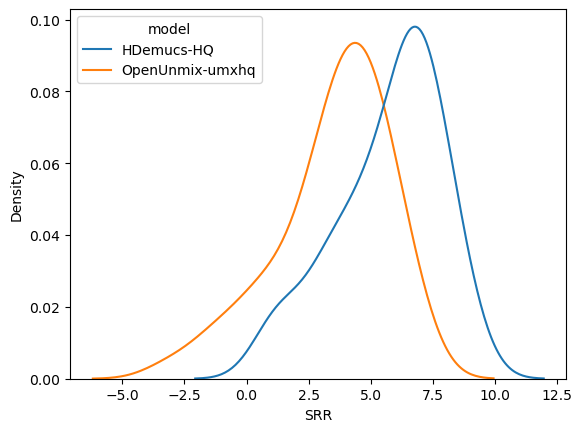

In [77]:
sns.kdeplot(dfa, x='SRR', hue='model')